In [11]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


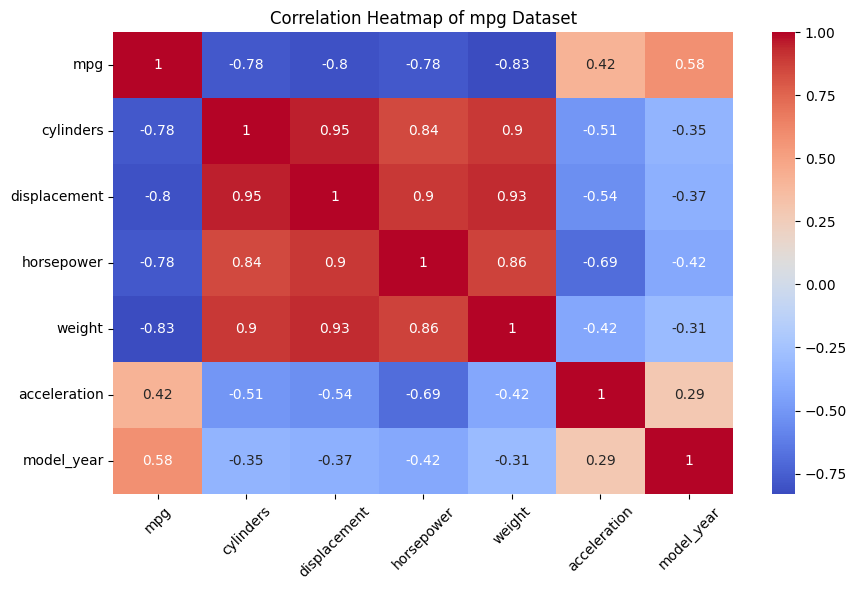

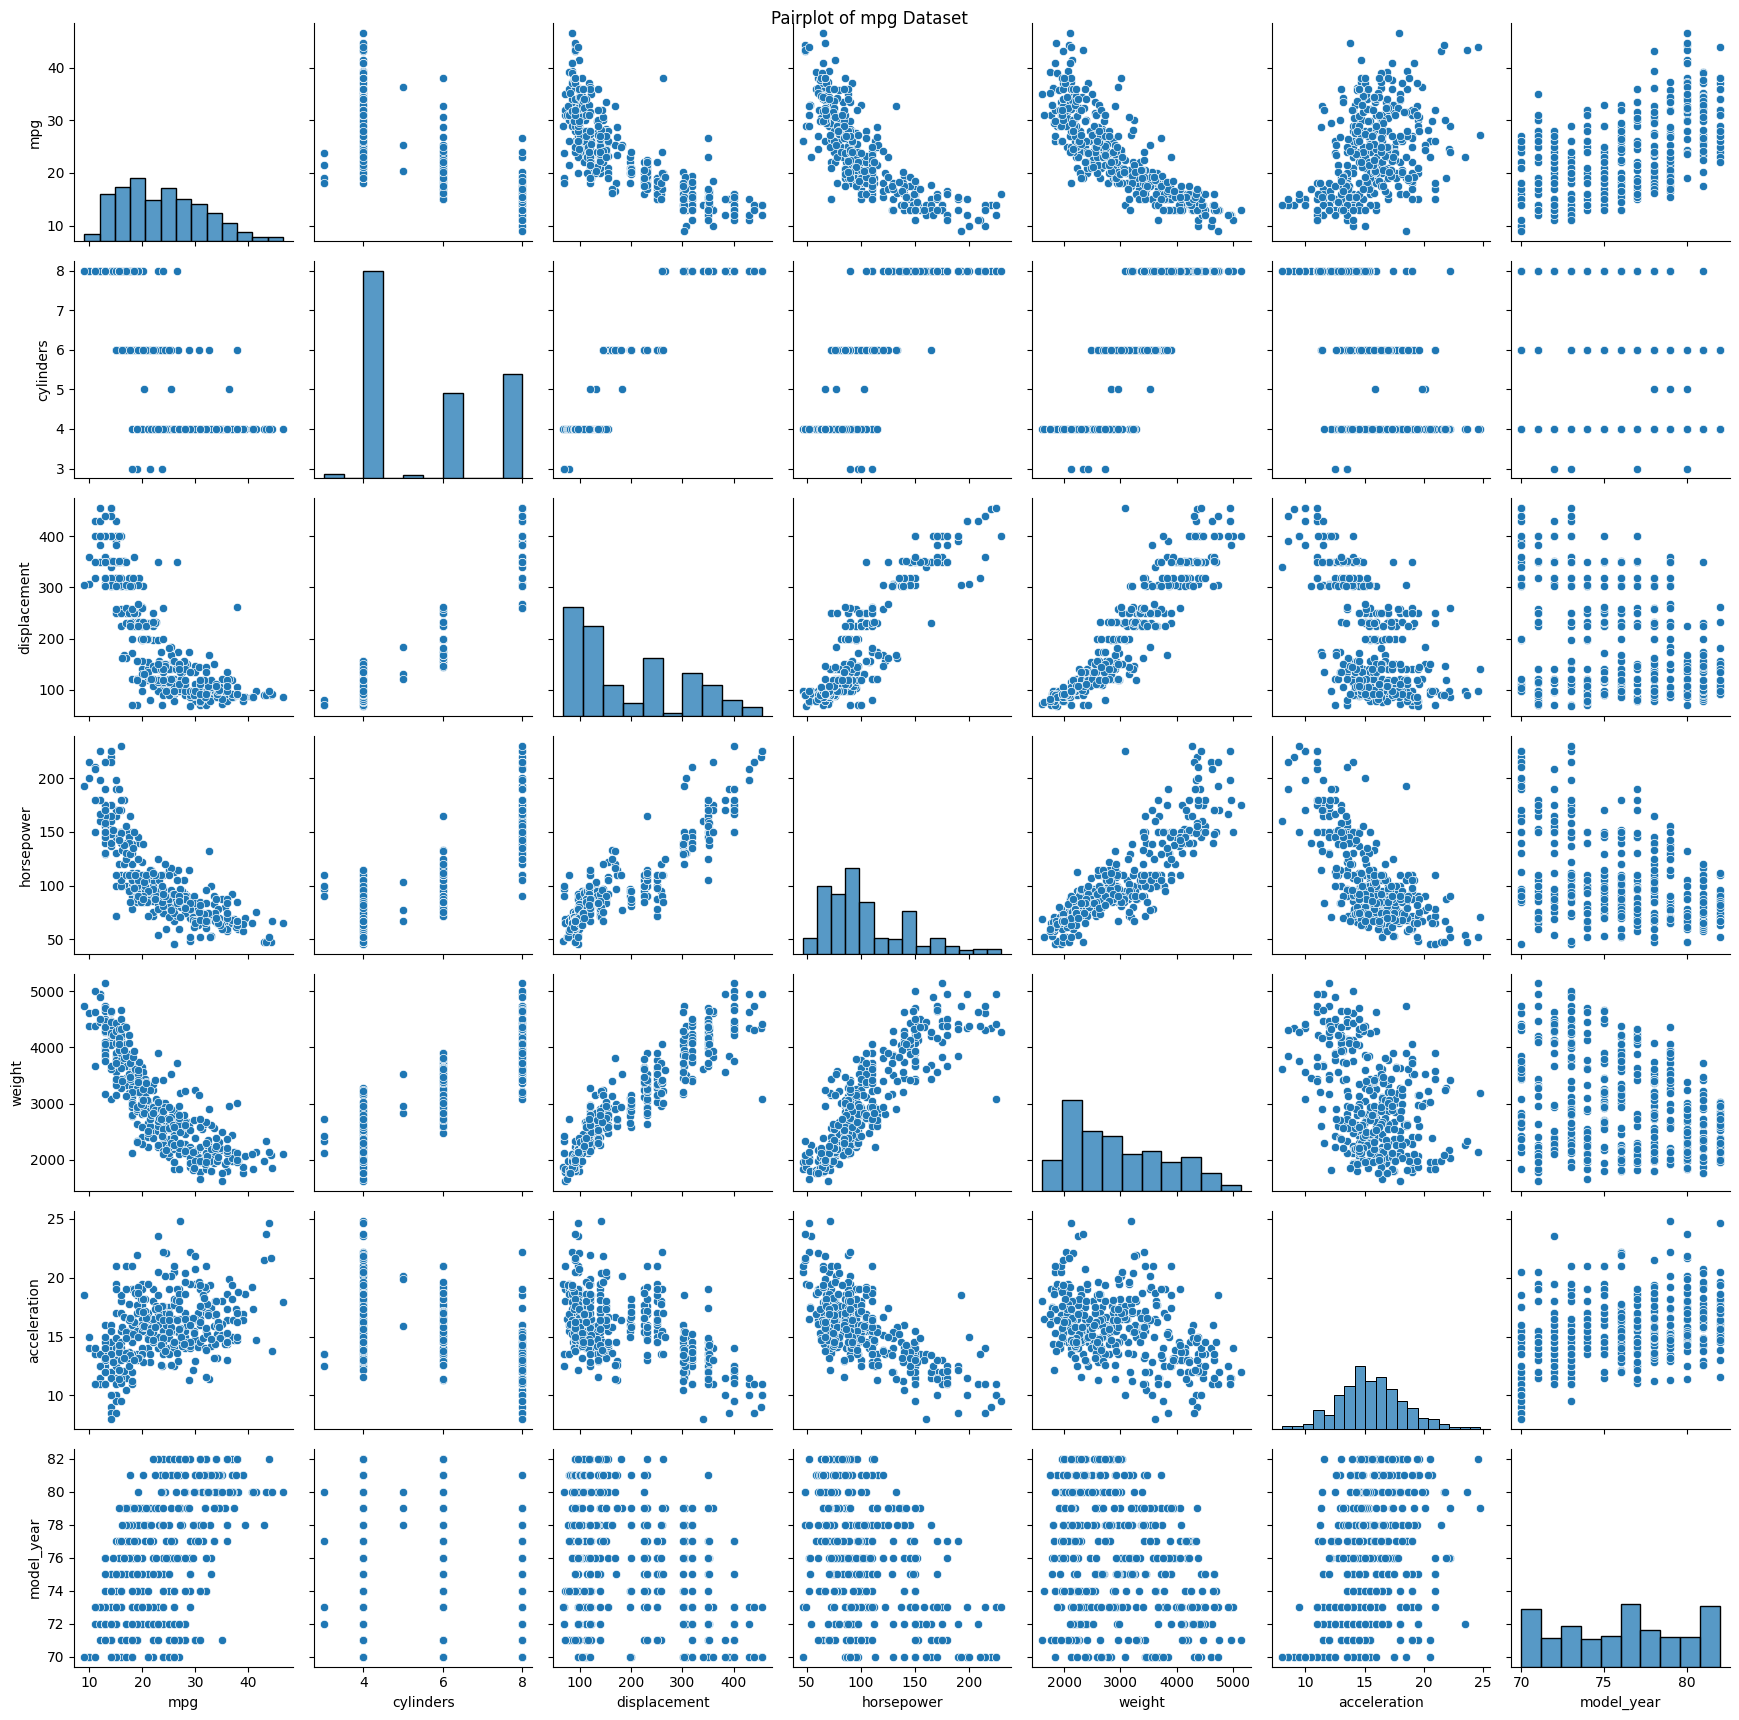

In [14]:
# Assignment 3, Part 1: Using the built-in Seaborn dataset mpg, provide the heatmap of the correlation of all the numeric columns and provide the pairplot of the same.
# Load the mpg dataset
mpg = sns.load_dataset("mpg")

# Create the heatmap
correlation = mpg.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.xticks(rotation=45)
plt.title("Correlation Heatmap of mpg Dataset")
plt.show()

# Create the pairplot
sns.pairplot(mpg.select_dtypes(include=[np.number]))
plt.suptitle("Pairplot of mpg Dataset")
plt.tight_layout()
plt.show()

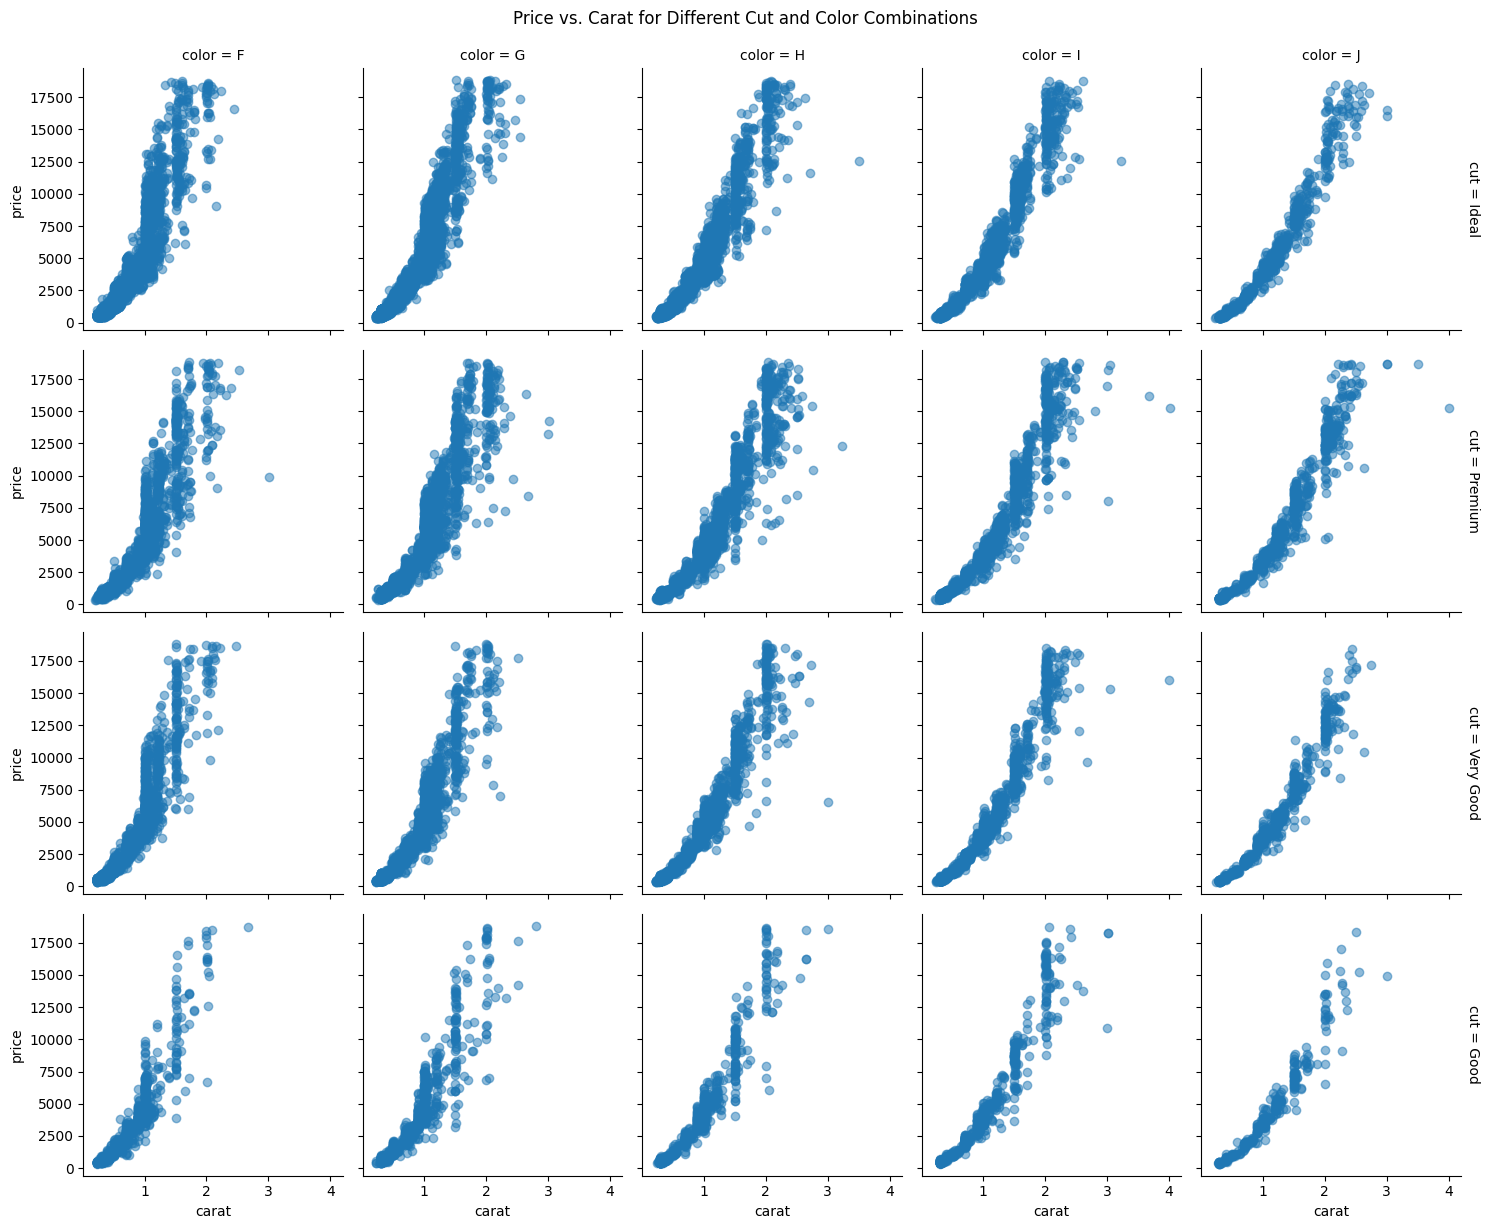

In [12]:
# Assignment 3, Part 2: Using the built-in Seaborn dataset diamonds, establish a FacetGrid based on ‘cut’ and ‘color’.  Eliminate colors ‘D’ and ‘E’ as well as the cut ‘Fair’.  Within that grid, plot the scatterplot for ‘price’ vs. ‘carat’.

# Load the diamonds dataset
diamonds = sns.load_dataset('diamonds')

# Filter out colors 'D' and 'E' and cut 'Fair'
filtered_diamonds = diamonds[(diamonds['color'] != 'D') & (
    diamonds['color'] != 'E') & (diamonds['cut'] != 'Fair')]

# Remove unused categories in 'color' and 'cut' columns
filtered_diamonds = filtered_diamonds[filtered_diamonds['color'].isin(
    ['F', 'G', 'H', 'I', 'J'])]
filtered_diamonds = filtered_diamonds[filtered_diamonds['cut'].isin(
    ['Ideal', 'Premium', 'Very Good', 'Good'])]

# Convert 'color' and 'cut' columns to categories
filtered_diamonds['color'] = pd.Categorical(
    filtered_diamonds['color'], categories=['F', 'G', 'H', 'I', 'J'])
filtered_diamonds['cut'] = pd.Categorical(filtered_diamonds['cut'], categories=[
                                          'Ideal', 'Premium', 'Very Good', 'Good'])
# Create FacetGrid
g = sns.FacetGrid(filtered_diamonds, row='cut',
                  col='color', margin_titles=True)

# Plot scatterplot for 'price' vs. 'carat' within the FacetGrid
g.map(plt.scatter, 'carat', 'price', alpha=0.5)
g.figure.suptitle(
    'Price vs. Carat for Different Cut and Color Combinations', y=1.02)
plt.show()

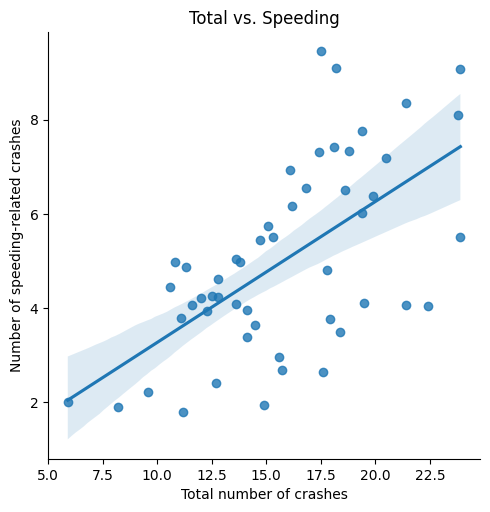

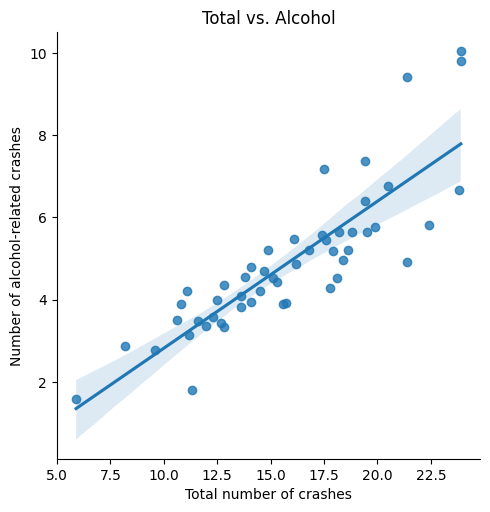

In [33]:
# Assignment 3, Part 3: Using the built-in Seaborn dataset car_crashes, prepare plots with the scatter gram with the linear model for both the total vs. speeding and the total vs. alcohol.
# Load the car crashes dataset
car_crashes = sns.load_dataset('car_crashes')

# Scatter plot with linear model for Total vs. Speeding
sns.lmplot(x='total', y='speeding', data=car_crashes)
plt.title('Total vs. Speeding')
plt.xlabel('Total number of crashes')
plt.ylabel('Number of speeding-related crashes')
plt.show()

# Scatter plot with linear model for Total vs. Alcohol
sns.lmplot(x='total', y='alcohol', data=car_crashes)
plt.title('Total vs. Alcohol')
plt.xlabel('Total number of crashes')
plt.ylabel('Number of alcohol-related crashes')
plt.show()

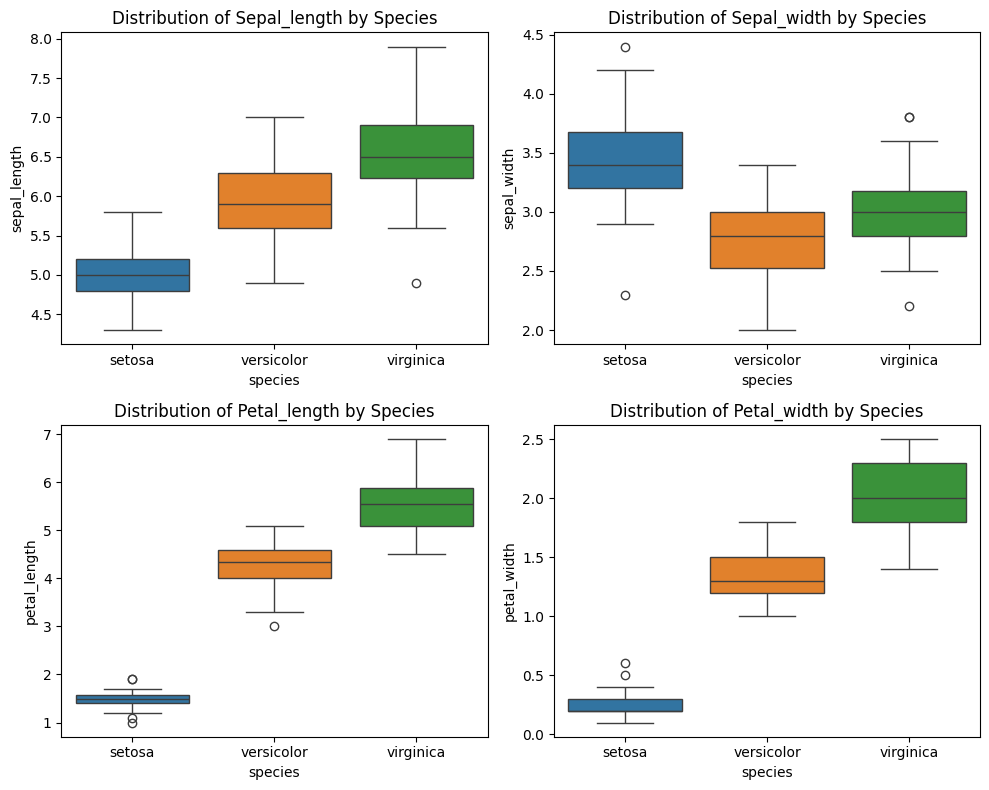

In [13]:
# Assignment 3, Part 4: Using the built-in Seaborn dataset iris, provide a plot with four subplots wherein the distribution of each of the numeric columns is presented as a set of boxplots, one for each ‘species’.
# Load the iris dataset
iris = sns.load_dataset('iris')

# Create a figure and axis with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Flatten the axis array for easy iteration
axes = axes.flatten()

# Iterate through numeric columns and create boxplots for each species
numeric_columns = ['sepal_length',
                   'sepal_width', 'petal_length', 'petal_width']
for i, column in enumerate(numeric_columns):
    sns.boxplot(x='species', y=column, data=iris, ax=axes[i], hue='species')
    axes[i].set_title(f'Distribution of {column.capitalize()} by Species')
    
# plot show
plt.tight_layout()
plt.show()